## Exploratory Data Analysis (EDA)

In this step of the project, we explored the structure, patterns, and trends within the M5 dataset to guide feature engineering and modeling. I'm only going to be looking at store CA_3. Played around with duckdb as well as recommended by Gregory Power.

In [25]:
import duckdb as ddb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [26]:
import os 

os.getcwd()

'/home/adam/Desktop/inventory-optimization-ai/notebooks'

In [27]:
# ponnect to an in-memory DuckDB instance
con = ddb.connect(database=':memory:')

# load the sales data into a persistant table
con.execute("""
    CREATE TABLE sales AS
    SELECT * FROM  read_csv_auto( "../data/processed/ca_food_sales.csv")
    """)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [63]:
# tryin out summarize expression for quick analysis
con.execute("""SUMMARIZE sales""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,id,VARCHAR,FOODS_1_001_CA_1_validation,FOODS_3_827_CA_4_validation,6015,None,None,None,None,None,8423403,0.00
1,item_id,VARCHAR,FOODS_1_001,FOODS_3_827,1342,None,None,None,None,None,8423403,0.00
2,dept_id,VARCHAR,FOODS_1,FOODS_3,3,None,None,None,None,None,8423403,0.00
3,store_id,VARCHAR,CA_1,CA_4,3,None,None,None,None,None,8423403,0.00
4,cat_id,VARCHAR,FOODS,FOODS,1,None,None,None,None,None,8423403,0.00
5,state_id,VARCHAR,CA,CA,1,None,None,None,None,None,8423403,0.00
6,d,VARCHAR,d_1,d_999,1722,None,None,None,None,None,8423403,0.00
7,sales,BIGINT,0,763,438,2.2789248003449436,6.071111230535486,0,1,2,8423403,0.00
8,date,DATE,2011-01-29,2016-04-24,1595,2014-01-14 23:24:42.690974,None,2012-11-12,2014-03-13,2015-04-20,8423403,0.00
9,wm_yr_wk,BIGINT,11101,11613,308,11373.324856236844,145.39980252556248,11242,11406,11512,8423403,0.00


In [32]:
# query only the california store CA_3 (biggest in terms of sales). Original Data is still available for full analysis of California.
query_ca = """
    SELECT *
    FROM sales
    WHERE store_id='CA_3'
    """

df_cali_3 = con.execute(query_ca).fetchdf()

In [33]:
df =pd.DataFrame(df_cali_3)

In [34]:
# get overview of the data
print("shape: ", df.shape)
print("\ncolumns:\n", df.columns.tolist())
print("\nmissing values:\n", df.isna().sum())
df.describe(include="all")

shape:  (2217800, 22)

columns:
 ['id', 'item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']

missing values:
 id                    0
item_id               0
dept_id               0
store_id              0
cat_id                0
state_id              0
d                     0
sales                 0
date                  0
wm_yr_wk              0
weekday               0
wday                  0
month                 0
year                  0
event_name_1    2040001
event_type_1    2040001
event_name_2    2213247
event_type_2    2213247
snap_CA               0
snap_TX               0
snap_WI               0
sell_price            0
dtype: int64


,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
count,2217800,2217800,2217800,2217800,2217800,2217800,2217800,2.217800e+06,2217800,2.217800e+06,...,2.217800e+06,2.217800e+06,177799,177799,4553,4553,2.217800e+06,2.217800e+06,2.217800e+06,2.217800e+06
unique,1437,1437,3,1,1,1,1913,NaN,NaN,NaN,...,NaN,NaN,30,4,4,2,NaN,NaN,NaN,NaN
top,FOODS_3_824_CA_3_validation,FOODS_3_824,FOODS_3,CA_3,FOODS,CA,d_1912,NaN,NaN,NaN,...,NaN,NaN,StPatricksDay,Religious,Father's day,Cultural,NaN,NaN,NaN,NaN
freq,1913,1913,1254688,2217800,2217800,2217800,1437,NaN,NaN,NaN,...,NaN,NaN,6916,59771,1348,3238,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.388849e+00,2014-01-02 12:31:36.413382,1.136995e+04,...,6.388094e+00,2.013517e+03,NaN,NaN,NaN,NaN,3.285450e-01,3.288926e-01,3.289395e-01,3.241680e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2011-01-29 00:00:00,1.110100e+04,...,1.000000e+00,2.011000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2012-10-31 00:00:00,1.124000e+04,...,3.000000e+00,2.012000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2014-02-23 00:00:00,1.140400e+04,...,6.000000e+00,2.014000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.680000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,2015-04-04 00:00:00,1.151000e+04,...,9.000000e+00,2.015000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,3.980000e+00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.630000e+02,2016-04-24 00:00:00,1.161300e+04,...,1.200000e+01,2.016000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.948000e+01


### Sales over time

looks like there is pretty steady demand and some cyclical patters. Christmas is the reason for those drops to zero sales.

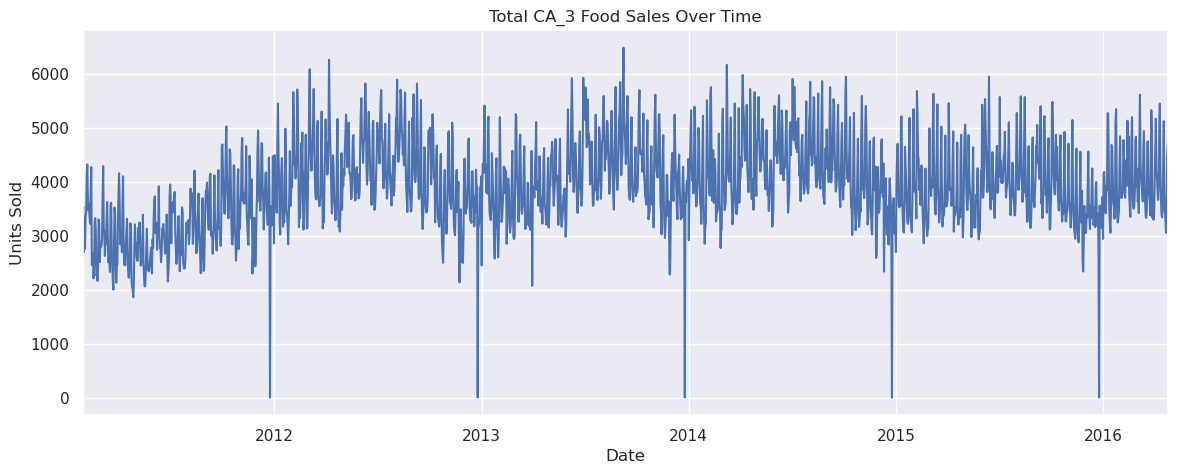

In [55]:
# Sales Over Time
daily_sales = df.groupby("date")["sales"].sum()
daily_sales.plot(figsize=(14, 5), title="Total CA_3 Food Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

### Top items sold

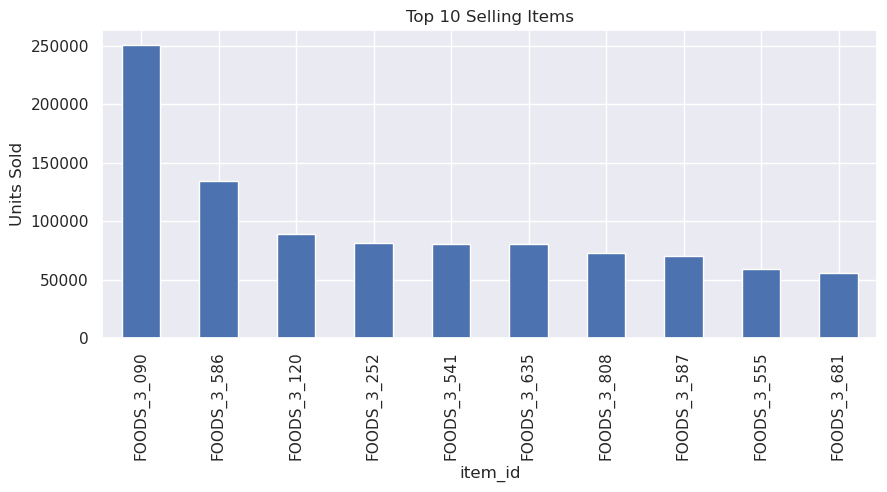

In [39]:
# 6. Top Items
top_items = df.groupby("item_id")["sales"].sum().sort_values(ascending=False).head(10)
top_items.plot(kind="bar", title="Top 10 Selling Items", figsize=(10, 4))
plt.ylabel("Units Sold")
plt.show()

### Top food departments

From the chart above it would seem that FOODS_3 is the big department. It is confirmed below by sales by department

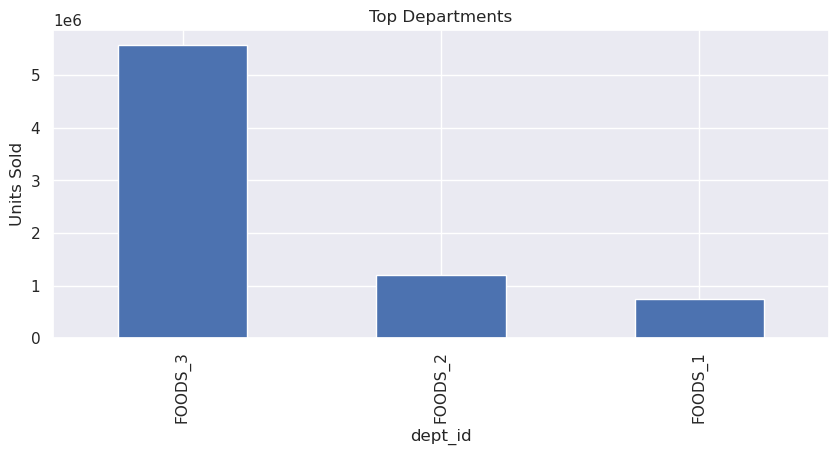

In [40]:
# 6. Top Departments
top_dept = df.groupby("dept_id")["sales"].sum().sort_values(ascending=False).head(10)
top_dept.plot(kind="bar", title="Top Departments", figsize=(10, 4))
plt.ylabel("Units Sold")
plt.show()

### Average sales by day

It seems people do their grocery shopping on the weekend the most

day_of_week
Monday       1082180
Tuesday       991670
Wednesday     955603
Thursday      947341
Friday       1020192
Saturday     1226295
Sunday       1292509
Name: sales, dtype: int64


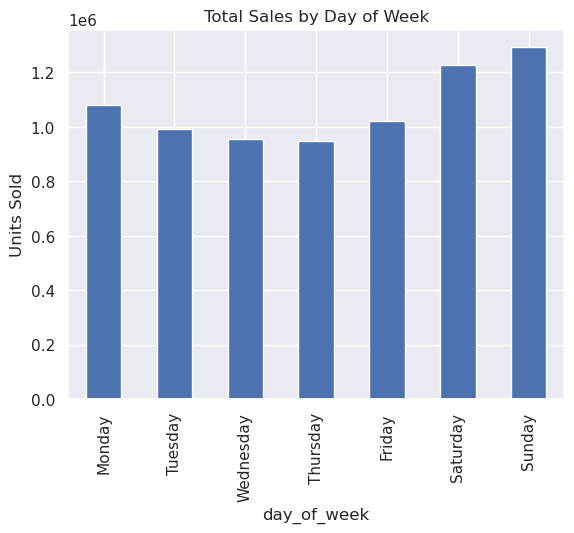

In [71]:
# 7. Sales by Day of Week
df["day_of_week"] = df["date"].dt.day_name()
dow_sales = df.groupby("day_of_week")["sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
print(dow_sales)
dow_sales.plot(kind="bar", title="Total Sales by Day of Week")
plt.ylabel("Units Sold")
plt.show()

### Total nomber of sales on event days
Aside from Christmas, there are way more units sold on event days. Per the summary table there's 999 days of data recorded. Averaging the number of items sold over this number would give us a rough estimate of how many items are sold a day (7523 units). It seems that event days really drive demand for groceries. Maybe parties?

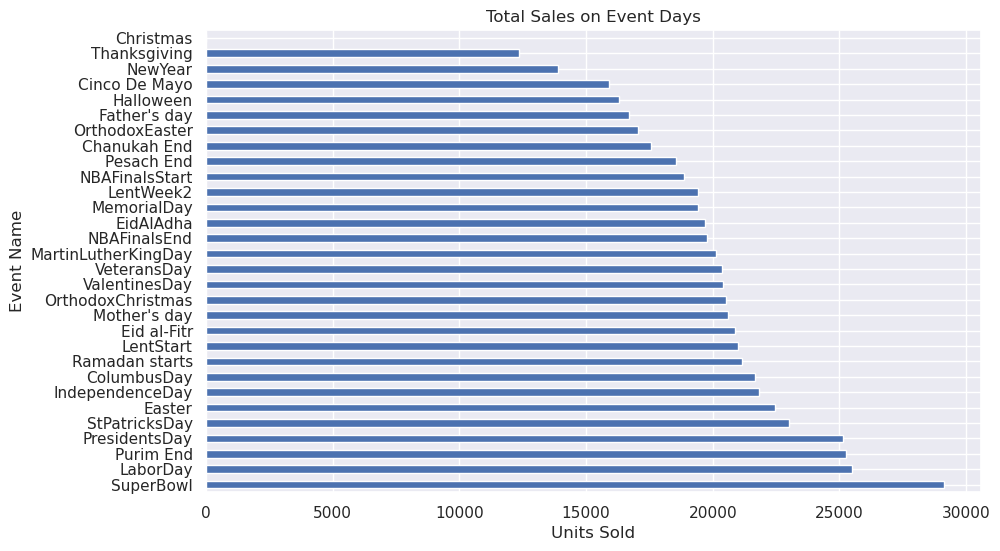

average units sold per day:  7523.313313313313


In [74]:
# 8. Holiday/Event Effects
event_sales = df[df["event_name_1"].notna()].groupby("event_name_1")["sales"].sum().sort_values(ascending=False)
event_sales.plot(kind="barh", title="Total Sales on Event Days", figsize=(10, 6))
plt.xlabel("Units Sold")
plt.ylabel("Event Name")
plt.show()
# average number of units sold per day. 999 days of data
print("average units sold per day: ", df["sales"].sum()/999)

###  Sales by Month
I wanted to see if one month had more sales than another and it looks like March takes the cake

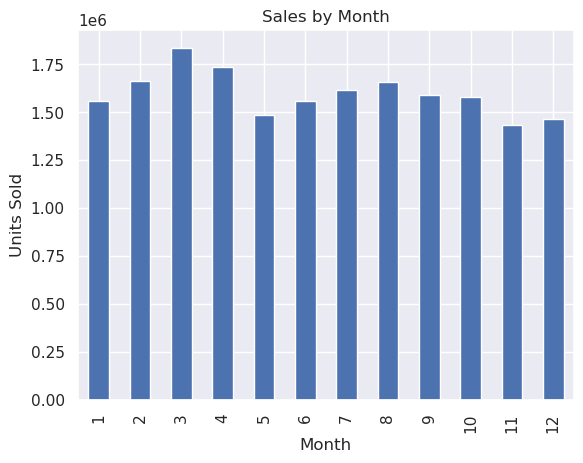

In [21]:
df['month'] = data['date'].dt.month
monthly_sales = data.groupby('month')['sales'].sum()

monthly_sales.plot(kind='bar', title='Sales by Month')
plt.ylabel('Units Sold')
plt.xlabel('Month')
plt.show()

### Sales by day of the month
It looks like far more items are sold at the beginning of the month.

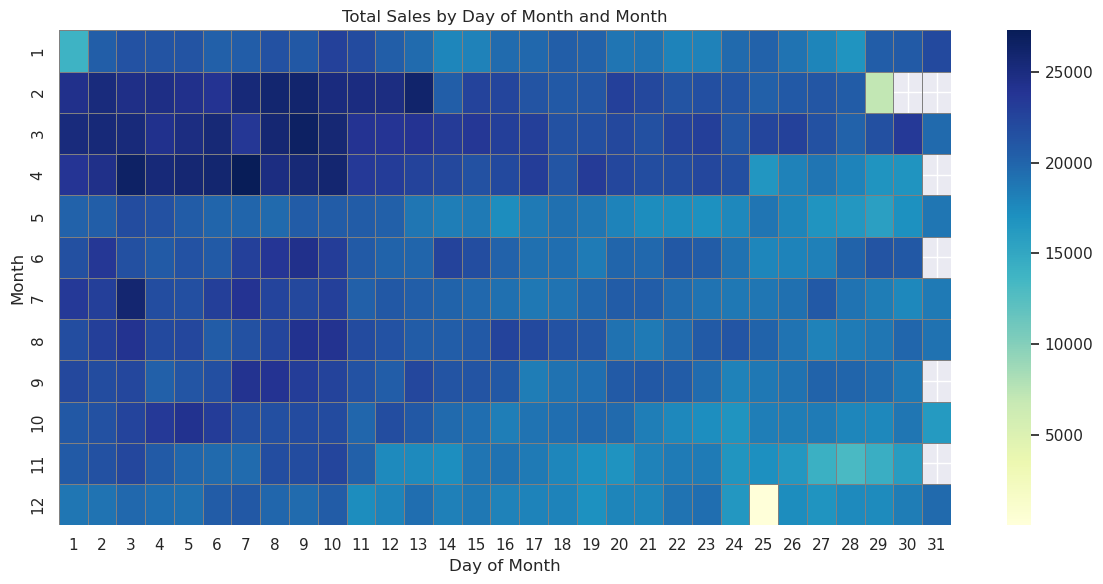

In [76]:
# Create new columns
df['day'] = df['date'].dt.day       # 1 to 31
df['month'] = df['date'].dt.month   # 1 to 12

# Aggregate total sales by month and day
heatmap_data = df.groupby(['month', 'day'])['sales'].sum().unstack()

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title("Total Sales by Day of Month and Month")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("02_total_sales_by_dom.png")
plt.show()